In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

warnings.filterwarnings('ignore')

### Data Exploration

In [2]:
df = pd.read_csv('indian_liver_patient.csv')

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


so we have only one object datatype ie catagorical feature

In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

only one column has null value ie 4

this is good!!

In [5]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)
df.shape

(583, 11)

### Data Visualisation

1    416
2    167
Name: Dataset, dtype: int64


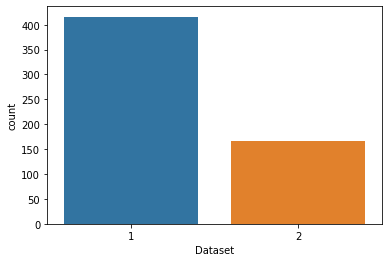

In [6]:
print(df.Dataset.value_counts())
sns.countplot(df.Dataset,data=df)

In [7]:
df_dis = df[df['Dataset']==1]
df_notdis = df[df['Dataset']==2]

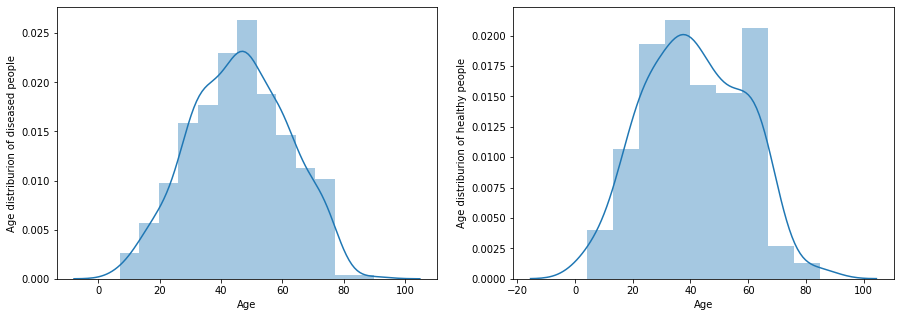

In [8]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_ylabel('Age distriburion of diseased people')
sns.distplot(df_dis.Age,ax=ax[0])
ax[1].set_ylabel('Age distriburion of healthy people')
sns.distplot(df_notdis.Age,ax=ax[1])

age group of 40 to 60 are likely to be diseased

<Figure size 1080x360 with 0 Axes>

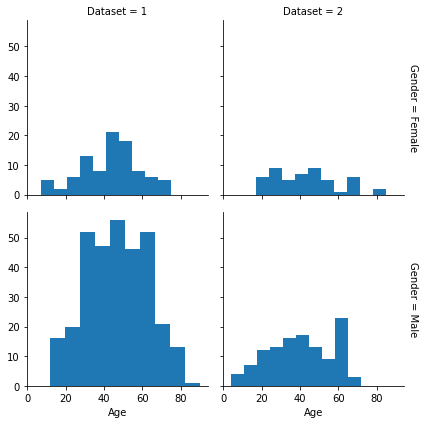

In [9]:
plt.figure(figsize=(15,5))
g = sns.FacetGrid(df,col='Dataset',row='Gender',margin_titles=True)
g.map(plt.hist,'Age')


too much insights over here..
there are more male who are diseased 

both total and direct bilubirin seems to have similar distributoin

now since we are dealing with classification problem we will find feature to feature relationship

In [10]:
df_temp = df.drop(['Gender','Age'],axis=1)

df_temp.head()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,3.9,2.0,195,27,59,7.3,2.4,0.40,1


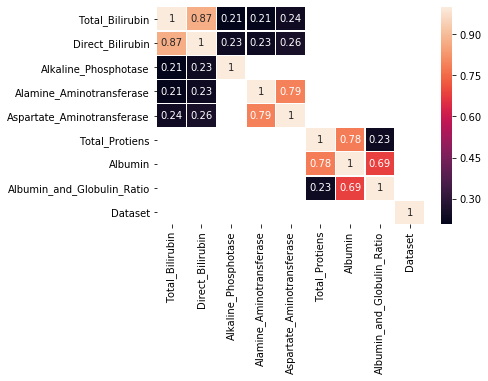

In [11]:
# lets first see feature to feature correaltion
corr = df_temp.corr()

sns.heatmap(corr[(corr>0.2)],linewidths=0.1,annot=True)

there is quite good relation in 
direct-bilubirin - total-bilubirin ,
Total_protiens - Albumin  ,
Albumin_and_Globulin_Ratio - Albumin ,


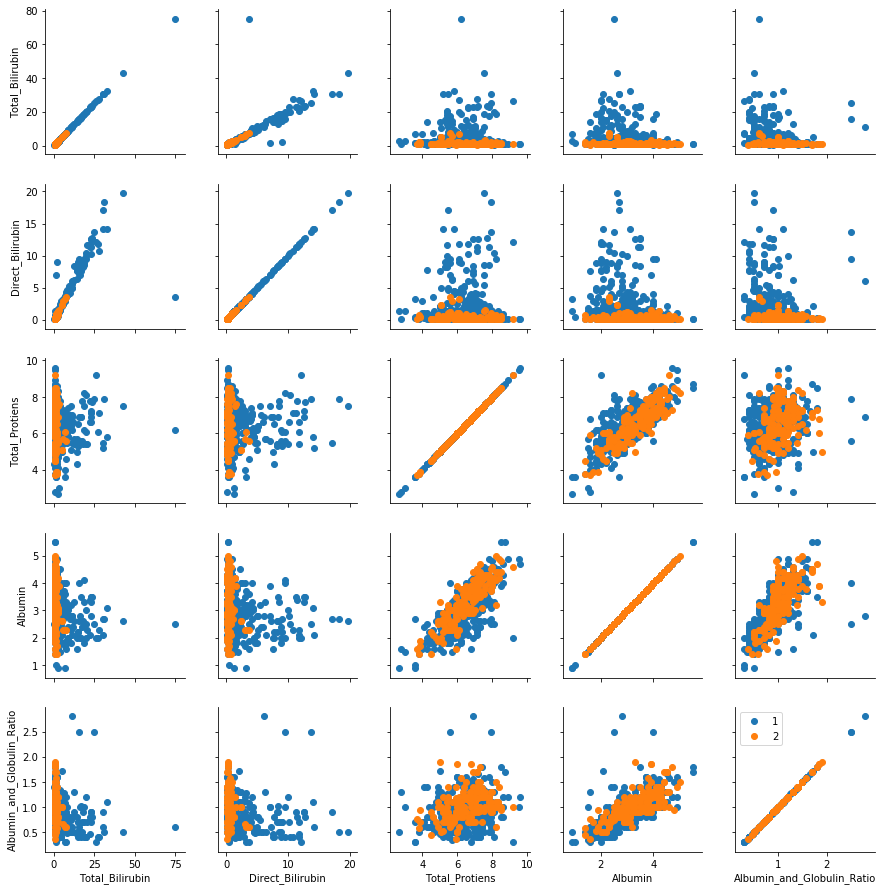

In [12]:

g = sns.PairGrid(df,hue='Dataset',
                 vars=['Total_Bilirubin',
                       'Direct_Bilirubin',
                       'Total_Protiens',
                       'Albumin',
                       'Albumin_and_Globulin_Ratio'])
g.map(plt.scatter)
plt.legend()
plt.show()

### Result of analysis

- Age and Gender affect the occurence of disease.
- Some features are directly correlated like Total_Bilirubin and Direct_Bilirubin, Aspartate_Aminotransferase and Alamine_Aminotransferase, Total_Protiens and Albumin.
- Male has more the no of liver disease than female

### Feature selection

- since we have many linear relationhsips we can remove some of the features before modelling

In [13]:
#since gender is catagorical we need to encode it

df = pd.concat([df,pd.get_dummies(df['Gender'],prefix='Gender')],axis=1)

x = df.drop(['Gender','Dataset','Total_Bilirubin','Aspartate_Aminotransferase'],axis=1)

y= df['Dataset']


### Machine Learning

### LinearRegression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

model = LinearRegression()

model.fit(x_train,y_train)

prediction = model.predict(x_test)

print('training score',model.score(x_train,y_train))
print('Accuracy:',model.score(x_test,y_test))


training score 0.1304745447160246
Accuracy: 0.08049225763295342


### RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier()

model.fit(x_train,y_train)

prediction = model.predict(x_test)

print('Accuracy',accuracy_score(y_test,prediction))

Accuracy 0.6685714285714286
